<a href="https://colab.research.google.com/github/joseflix/DocenciaUAB/blob/master/MN1/2021_2022/Pr%C3%A0ctiques/Pr%C3%A0ctica7_Likelihood_Soluciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Práctica 7: Método de máxima verosimilitud (likelihood) at work** [Solucions]

<hr>

**Objectivo de la práctica** 

Ver como aplicar el método de máxima verosimilitud (MLE) para estimar parámetros de una distribución, dada una muestra de valores independientes que siguen la distribución.

En esta práctica vamos a aplicar el método de máxima verosimilitud para encontrar el parámetro $\lambda$ de una distribución de Poisson. 

Es una práctica a modo de ejemplo, porque en este caso el valor esperado de una muestra (media aritmética) que sigue una Poisson es $\lambda$. Pero el método de MLE es muy potente y aplicable a cualquier distribución de probabilidad, también válido para N-dimensiones.

<hr>

### <font color='green'>**> Ejercicio #1**</font>

<hr>

<font color='green'>Esta práctica de 1h no tiene entrega, pero se tienen que realizar los ejercicios de programación durante la clase...</font>

<hr>

Vamos primero a generar 10000 números a partir de una Poisson con $\lambda=5.6$. Esta será la muestra que usaremos para evaluar $\lambda_{mle}$, que si todo va bien, deberíamos obtener un valor cercano a 5.6... 

Podemos usar la función de *Scipy.stats* que es *poisson.rvs(l, size=N)*, que genera *N* valores que siguen una poisson conn $\lambda = l$. 

Guarda los valores en una lista de *Python* y haz un histograma normalizado de los valores, y haz una gráfica de la pdf de una Poisson con esta $\lambda$:

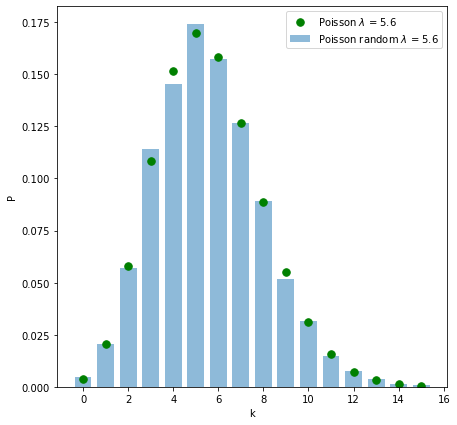

In [ ]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

l = 5.6 # No llamo a esto lambda, porque en Python hay una función llamada lamda (!)
N = 10000

#s = np.random.poisson(l, N) # Se puede usar esta función de Numpy
s = ss.poisson.rvs(l, size=N) # O la función de Scipy.stats

k = np.linspace(0,15,16)
#k = np.arange(0,16,1) # Otra forma de hacer un array 0,1,2,3...,15
y = ss.poisson.pmf(k, l)

plt.figure(figsize=(7, 7))
plt.hist(s,range=[0,16],bins=16,density=True,rwidth=0.75, align='left', alpha=0.5, label=r"Poisson random $\lambda$ = {}".format(l))
plt.xlabel("k")
plt.ylabel("P")
plt.plot(k,y,'g.', markersize=15, label=r"Poisson $\lambda$ = {}".format(l))
plt.legend()
plt.show()


### <font color='orange'>**> Python #1**</font>

Sabemos que la media aritmética es un estimador de la media independientemente de la distribución que sigan las variables aleatorias. También sabemos que $\lambda$ coincide con la media de la distribución de Poisson (E[k], o sea, la media de nuestra muestra). También sabemos que V[k] = $\sigma^2$ = $\lambda$.

Calcula la media aritmética y la variancia de la muestra, y comprueba que son similares al $\lambda$=5.6 que has usado para generar la muestra:


In [ ]:
print("Media: {:3.2f}".format(np.mean(s))) # Esto sería el estimador de lamdba 
print("Variancia: {:3.2f}".format(np.var(s)))

Media: 5.59
Variancia: 5.67


### <font color='orange'>**> Python #2**</font>

Podemos usar la función de likelihood para encontrar el valor de $\lambda_{mle}$. Será aquel valor que maximiza la función de Likelihood. 

Vamos a implementar la función que calcula $l = ln(L)$ (log-likelihood), para un rango de valores de $\lambda$. Haremos una gráfica de los valores de $l$ en un rango de $\lambda$ entre [1,15] y evaluaremos cual es el $\lambda_{óptimo}$ (aquel que maximiza la función $l$). Generaremos 1000 puntos de $\lambda$s en el rango. 

Recuerda, que para cada $\lambda_i$ en el rango se calcula $l_i$ como:

$$
l_i = ln(L_i) = \sum_{n=1}^{N} ln f(x_n, \lambda_i)
$$

Usa los 10000 valores que has generado en el ejercicio #1 como tu muestra (los que has usado para hacer el histograma).

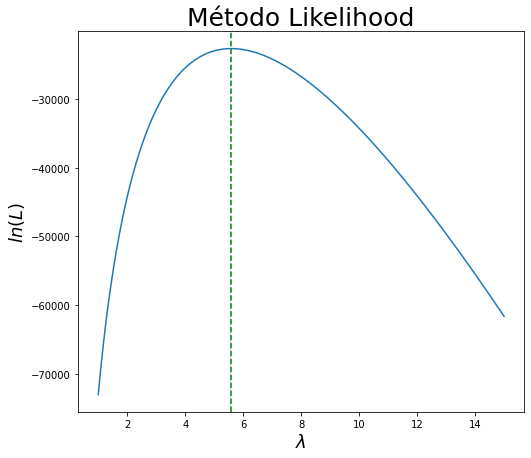


 Lambda_mle = 5.58 



In [ ]:
import scipy.stats as ss

L = []
lambstep = np.linspace(1,15,1000)

for i in lambstep:
  # Método 1, por pasos
  ln_m = np.log(ss.poisson.pmf(s,i)) # ln para cada uno de los puntos
  sum_ln = 0
  for j in range(len(ln_m)):
    sum_ln += ln_m[j] # Sumar todos los elementos
  L.append(sum_ln)

  # Método 2, en un paso
  #L.append(np.cumsum(np.log(ss.poisson.pmf(s,i)))[-1]) # Un único paso

plt.figure(figsize=(8, 7))
plt.plot(lambstep,L)
plt.title('Método Likelihood', fontsize=25)
plt.xlabel('$\lambda$', fontsize=18)
plt.ylabel('$ln(L)$', fontsize=18)
plt.axvline(lambstep[L.index(np.max(L))], linestyle='--', color='green')
plt.show()

#print(L)

print("\n Lambda_mle = {:3.2f} \n".format(lambstep[L.index(np.max(L))]))

### <font color='orange'>**> Python #3**</font>

Vamos a ver que tanto la media aritmética como el valor que encontramos con el método de likelihood son estimadores buenos para cualquier muestra de tamaño *n*. De hecho, se puede ver analíticamente, como podéis consultar [en este enlace](https://cran.r-project.org/web/packages/opart/vignettes/opart_poisson.html)

Repite el ejercicio anterior, calculando $\lambda_{mle}$ para una muestra que generes de n puntos (n=100, 200, 300...,5000), y compara $\lambda_{mle}$ con la media aritmética. 

Haz una gráfica de $\lambda_{mle}$ y $\bar{x}$ en función de $n$. Dibuja una línea horizontal a $\lambda$ = 5.6.

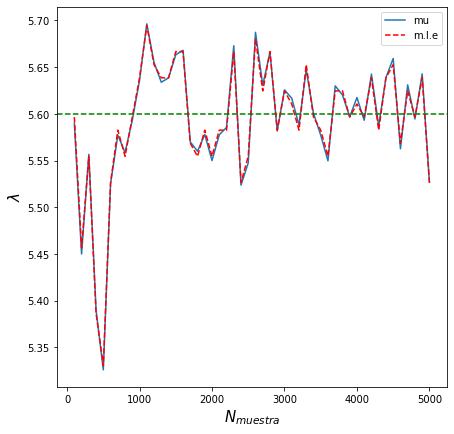

In [ ]:
lamb = 5.6 # No llamo a esto lambda, porque en Python hay una función llamada lambda

Np = []
ArMed = []
Lmet = []

lambstep = np.linspace(1,15,1000)

for n in range(100,5100,100):
  Np.append(n)
  s = np.random.poisson(lamb, n) # Generamos n puntos que siguen una Poisson
  ArMed.append(np.mean(s))
  L = []
  for i in lambstep:
    L.append(np.cumsum(np.log(ss.poisson.pmf(s,i)))[-1])
  Lmet.append(lambstep[L.index(np.max(L))])

plt.figure(figsize=(7, 7))
plt.plot(Np,ArMed, label="mu")
plt.plot(Np,Lmet, "r--",label="m.l.e")
plt.legend(loc='best')
plt.axhline(5.6,0,1, linestyle='--', color='green')
plt.xlabel(r"$N_{muestra}$", fontsize=15)
plt.ylabel(r"$\lambda$", fontsize=15)
plt.show() 

### <font color='red'>**> Python #4 (EXTRA)**</font>

Notamos que para evaluar el $\lambda_{mle}$ hemos tomado un rango con 1000 $\lambda$s entre 1 y 15. Cuando encontramos el máximo de la lista, fijaros que la precisión es (15-1)/1000 = 0.014. Podemos buscar el máximo de forma más precisa, o bien ajustando la curva, o aumentando el número de $\lambda$s.

En el ejercicio anterior, la diferencia absoluta entre $\mu$ y $\lambda_{mle}$ serà menor que 0.014, de hecho 0.014/2. Veámoslo:

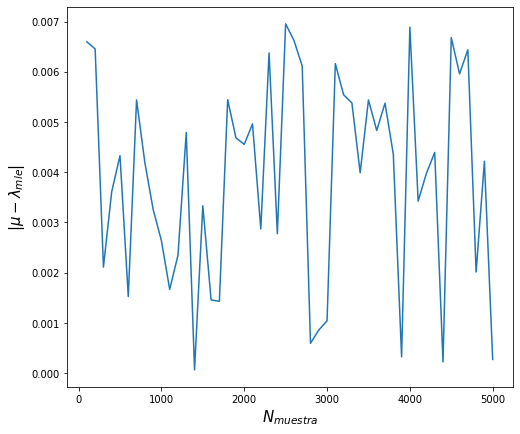

Step: 0.014


In [ ]:
difference = []

#zip_object = zip(ArMed, Lmet)
#for list1_i, list2_i in zip_object:
#    difference.append(np.abs(list1_i-list2_i))

for i in range(len(ArMed)):
  difference.append(np.abs(ArMed[i]-Lmet[i]))

plt.figure(figsize=(8, 7))
plt.plot(Np,difference)
plt.xlabel(r"$N_{muestra}$", fontsize=15)
plt.ylabel(r"$|\mu - \lambda_{mle}|$", fontsize=15)
plt.show()

print("Step:", (max(lambstep)-min(lambstep))/1000.)